In [2]:
import numpy as np
import pandas as pd
import collections as col
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
from sklearn.feature_selection import mutual_info_classif

sns.set()
warn.filterwarnings('ignore')

In [3]:
# Reading data
df1 = pd.read_csv('../data/dataset.csv') # Dataset 1
df2 = pd.read_csv('../data/TCS.BO.csv') # Dataset 2

In [4]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Unnamed: 8,Unnamed: 9,Date.1,Unnamed: 11,Unnamed: 12
0,14-01-2002,38.500000,39.500000,38.062500,38.400002,20.417883,83688,NaN,NaN,NaN,NaN,NaN,NaN
1,15-01-2002,38.112499,38.724998,37.150002,37.412498,19.892815,47496,NaN,NaN,NaN,NaN,NaN,NaN
2,16-01-2002,38.049999,38.500000,37.125000,37.700001,20.045681,51624,NaN,NaN,NaN,NaN,NaN,NaN
3,17-01-2002,36.250000,38.750000,36.250000,38.337502,20.384659,85840,NaN,NaN,NaN,NaN,NaN,NaN
4,18-01-2002,38.750000,39.974998,38.150002,38.549999,20.497646,78928,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Adding price column to the indicator dataset
n = df1['Date'].size
df2Close = df2['Close'].to_list()
df2Date = df2['Date'].to_list()
prices = []
for i in range(n):
    df1Date = df1['Date'].iloc[i]
    price = df2Close[df2Date.index(df1Date)]
    prices.append(price)

df1['Price'] = prices
features = df1.columns[1:-1]

# Building the final datset to be used throughout
df = pd.concat([df1['Date'],df1['Price'],df1[features]], axis=1)
df.head()

,Date,Price,Volume,AO,ROC_12,ROC_26,ROC_50,ROC_200,EMA_12,EMA_26,...,WILLR_125,VWMA_14,VWMA_20,STOCH_d,STOCH_k,SMA_12,SMA_26,SMA_50,SMA_200,Signal
0,12-11-2002,36.974998,42304,7.932132,1.405545,-1.465698,-12.588655,-3.710945,43.493023,43.816629,...,-97.498357,44.108333,42.767381,0.145167,0.035445,43.116667,43.115866,44.26300,56.377938,WAIT
1,13-11-2002,36.625000,40440,-6.857685,2.268761,-4.498041,-15.561960,-2.104907,42.436404,43.283916,...,-97.959185,43.364286,42.346964,0.035870,0.033248,43.184375,43.049519,44.12800,56.374000,BUY
2,14-11-2002,37.062500,57552,-6.955552,2.382595,-1.133709,-13.582048,-1.690983,41.609649,42.823070,...,-97.383148,42.682262,41.974107,0.034403,0.034516,43.256250,43.033173,44.01150,56.370813,WAIT
3,15-11-2002,37.937500,76520,-6.895258,3.161111,1.369408,-8.639377,-1.043369,41.044703,42.461176,...,-96.231074,42.111191,41.688869,0.035050,0.037384,43.353125,43.052885,43.93975,56.368813,WAIT
4,18-11-2002,38.325001,133176,-6.703199,2.576117,0.590557,-6.008585,-0.583654,40.626287,42.154793,...,-95.720869,41.571548,41.445774,0.037440,0.040419,43.433333,43.061539,43.89075,56.367688,WAIT


In [6]:
df.describe() # Checking the distribution of the data

,Price,Volume,AO,ROC_12,ROC_26,ROC_50,ROC_200,EMA_12,EMA_26,EMA_50,...,WILLR_20,WILLR_125,VWMA_14,VWMA_20,STOCH_d,STOCH_k,SMA_12,SMA_26,SMA_50,SMA_200
count,4321.000000,4.321000e+03,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000,...,4321.000000,4321.000000,4321.000000,4321.000000,4.321000e+03,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000
mean,760.011773,6.810449e+05,6.359504,1.115398,2.758532,5.569295,24.970505,757.789148,754.763318,749.601010,...,-46.852639,-44.180209,758.307056,757.417971,4.962610e-01,0.495932,757.790173,754.703812,749.645598,715.619802
std,635.344924,1.513554e+06,41.386467,8.074509,11.774856,17.804434,46.655491,633.132119,631.448100,628.743609,...,29.443681,28.813611,633.495867,632.950802,3.114116e-01,0.325458,633.230243,631.571772,629.353310,608.805691
min,30.112499,1.028600e+04,-374.832059,-61.922989,-65.040505,-63.861386,-69.894169,32.179726,34.231490,36.277621,...,-99.869230,-99.774993,31.709404,32.348214,3.700000e-17,0.000000,31.897916,33.471634,35.109250,45.324437
25%,211.630997,1.214940e+05,-9.183555,-2.815371,-3.428697,-4.001878,-1.468877,210.318454,212.395517,213.769635,...,-72.729032,-67.903581,210.528248,210.074786,1.999060e-01,0.181107,210.698915,211.237271,213.798020,197.749085
50%,567.750000,2.808400e+05,5.284081,1.120895,2.512075,3.755851,16.954519,568.963026,568.494895,562.538576,...,-44.419135,-43.687884,567.776899,569.723448,5.061580e-01,0.504051,568.145838,570.036539,567.570004,554.639875
75%,1240.500000,7.924400e+05,19.218971,5.014524,8.420773,12.674853,39.731126,1245.306304,1238.992178,1234.135669,...,-21.130230,-18.056260,1243.825516,1245.178426,7.889764e-01,0.802536,1243.325002,1242.915377,1235.046592,1222.521601
max,2630.000000,5.229047e+07,213.543681,94.480604,101.047277,134.811672,287.446580,2247.922686,2222.937736,2196.040568,...,-0.538793,-0.108846,2258.676642,2250.726409,1.000000e+00,1.000000,2257.954163,2233.940383,2193.642993,2154.975746


We can see that st

In [7]:
df.info() # No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4321 non-null   object 
 1   Price      4321 non-null   float64
 2   Volume     4321 non-null   int64  
 3   AO         4321 non-null   float64
 4   ROC_12     4321 non-null   float64
 5   ROC_26     4321 non-null   float64
 6   ROC_50     4321 non-null   float64
 7   ROC_200    4321 non-null   float64
 8   EMA_12     4321 non-null   float64
 9   EMA_26     4321 non-null   float64
 10  EMA_50     4321 non-null   float64
 11  EMA_200    4321 non-null   float64
 12  EMV_12     4321 non-null   float64
 13  EMV_26     4321 non-null   float64
 14  EMV_50     4321 non-null   float64
 15  EMV_200    4321 non-null   float64
 16  MFI_12     4321 non-null   float64
 17  MFI_26     4321 non-null   float64
 18  MFI_50     4321 non-null   float64
 19  MFI_200    4321 non-null   float64
 20  RSI_12  

Only date and signal are non-numerical features.

Each row has equal number of non-null values, which signifies that there are no null values, to confirm this we can use the following code:

In [8]:
df.isnull().sum() # No null values

Date         0
Price        0
Volume       0
AO           0
ROC_12       0
ROC_26       0
ROC_50       0
ROC_200      0
EMA_12       0
EMA_26       0
EMA_50       0
EMA_200      0
EMV_12       0
EMV_26       0
EMV_50       0
EMV_200      0
MFI_12       0
MFI_26       0
MFI_50       0
MFI_200      0
RSI_12       0
RSI_26       0
RSI_50       0
RSI_200      0
ADI          0
CCI_14       0
CCI_20       0
MACD         0
ATR_14       0
ATR_20       0
ATR_50       0
WILLR_14     0
WILLR_20     0
WILLR_125    0
VWMA_14      0
VWMA_20      0
STOCH_d      0
STOCH_k      0
SMA_12       0
SMA_26       0
SMA_50       0
SMA_200      0
Signal       0
dtype: int64

We can see that there is no null value in our dataset.

<AxesSubplot: xlabel='Price', ylabel='Count'>

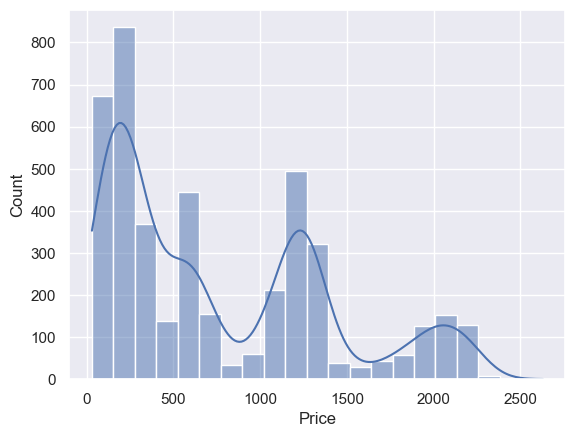

In [9]:
sns.histplot(df['Price'], kde=True) # Checking the distribution of the price

The variance in price is shown above.

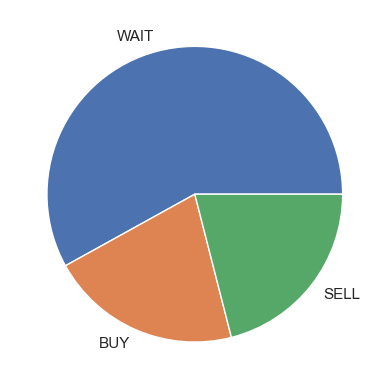

In [16]:
counts = col.Counter(df['Signal'])
plt.pie(counts.values(), labels=counts.keys()) # Checking the distribution of the signal (wait, buy, sell)
plt.show()

Most signals are of 'Wait' type. The rest few are of 'Buy' and 'Sell' type with equal distribution.

All the data at the end is Non-Null

In [11]:
# Data split: 70% training, 30% testing
# Since it's a time-series data, we only need to select the first 70% data points for training
from math import floor
n = df['Date'].size
X_train = df.iloc[0:floor(n*0.7), 2:-1]
X_test = df.iloc[floor(n*0.7):, 2:-1]
y_train = df.iloc[0:floor(n*0.7), -1]
y_test = df.iloc[floor(n*0.7):, -1]

Text(0.5, 0, 'Mutual Information Gain')

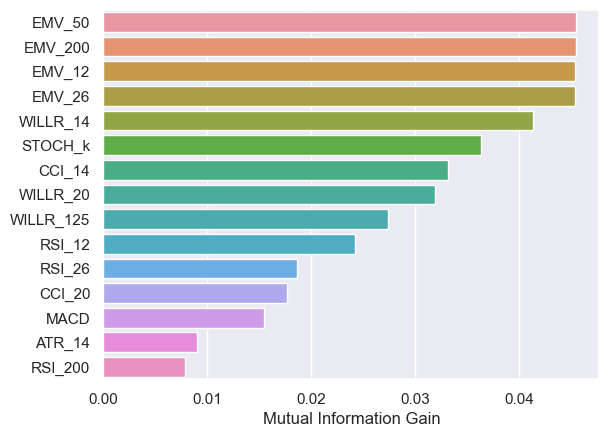

In [12]:
# Finding the mutual information gain of all features
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = df.columns[2:-1]
ig = mutual_info.sort_values(ascending=False)[:15]

# Plotting the information gains as a descending order list
sns.barplot(x=ig.to_list(),
y=['EMV_50','EMV_200','EMV_12','EMV_26','WILLR_14','STOCH_k','CCI_14','WILLR_20','WILLR_125','RSI_12','RSI_26',
'CCI_20','MACD','ATR_14','RSI_200'], orient='h')
plt.xlabel('Mutual Information Gain')

In [13]:
# List of top 15 features selected for use
features = ['EMV_50','EMV_200','EMV_12','EMV_26','WILLR_14','STOCH_k','CCI_14','WILLR_20','WILLR_125','RSI_12',
'RSI_26','CCI_20','MACD','ATR_14','RSI_200']
df = df[['Date','Price']+features+['Signal']]
X_train = df[features].iloc[0:floor(n*0.7)]
X_test = df[features].iloc[floor(n*0.7):]
y_train = df['Signal'].iloc[0:floor(n*0.7)]
y_test = df['Signal'].iloc[floor(n*0.7):]

<AxesSubplot: >

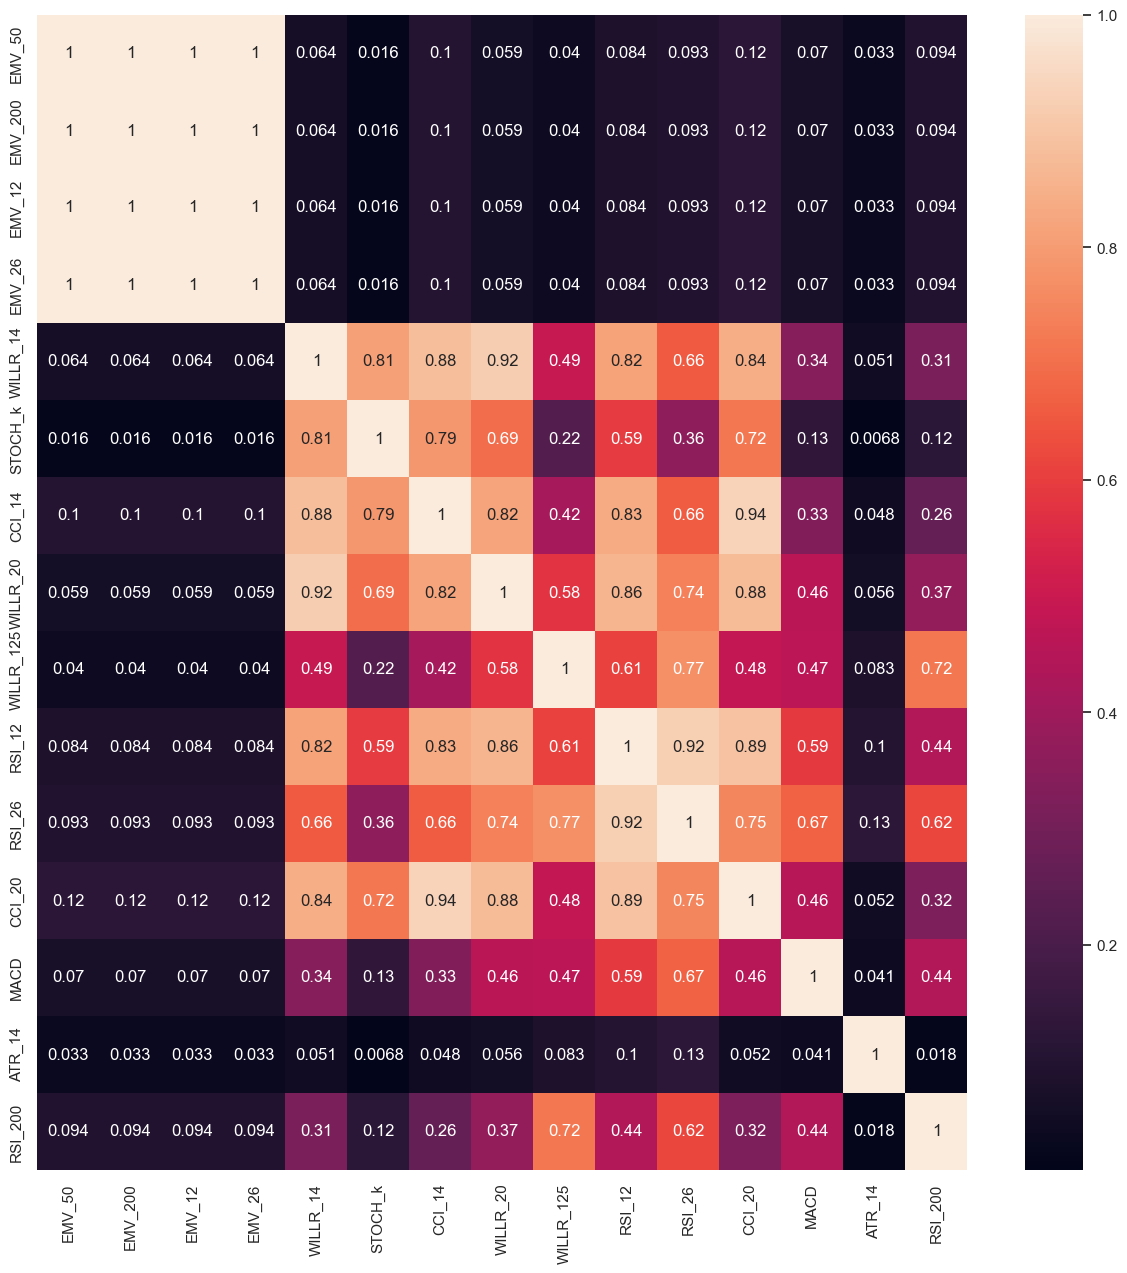

In [14]:
# Analysis of the extracted features
corr = df[features].corr().abs()
fig = plt.figure(figsize=(15,15))
sns.heatmap(data=corr, annot=True)

__Analysis:__ Since all the EMVs are fully correlated to each other, we can make do with any one of them. Let's take up EMV_50. So, the feature list can be further trimmed as follows: 

<AxesSubplot: >

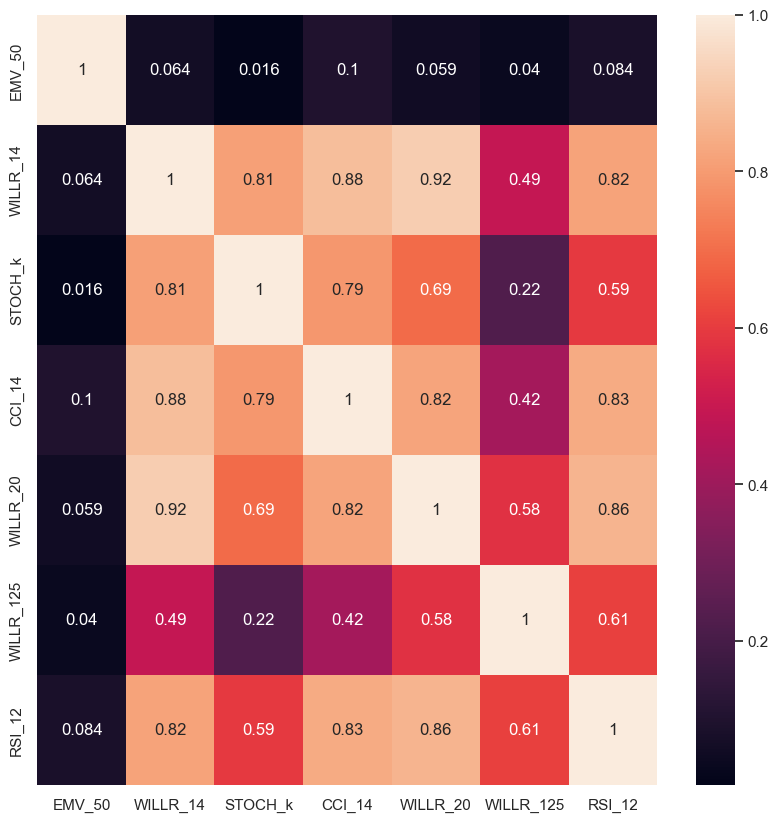

In [15]:
# Picking 10 out of these 15 based on absolute correlation 
features = ['EMV_50','WILLR_14','STOCH_k','CCI_14','WILLR_20','WILLR_125','RSI_12']
df = df[['Date','Price']+features+['Signal']]
X_train = df[features].iloc[0:floor(n*0.7)]
X_test = df[features].iloc[floor(n*0.7):]
y_train = df['Signal'].iloc[0:floor(n*0.7)]
y_test = df['Signal'].iloc[floor(n*0.7):]

# Finding absolute correlation matrix for these 10 selected features
corr = df[features].corr().abs()
fig = plt.figure(figsize=(10,10))
sns.heatmap(data=corr, annot=True)

We can now see the correlation between all the chosen features through this heatmap. 